In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# PCA(對高維資料進行降維)

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
x = iris.data
y = iris.target

In [5]:
from sklearn.decomposition import PCA

## step 1. 開 PCA 機

In [6]:
pca = PCA(n_components=2)

## step 2. 訓練

In [7]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

## step 3. 預測

In [8]:
x[87]

array([6.3, 2.3, 4.4, 1.3])

In [9]:
X = pca.transform(x)

In [10]:
X[87]

array([ 0.81509524, -0.37203706])

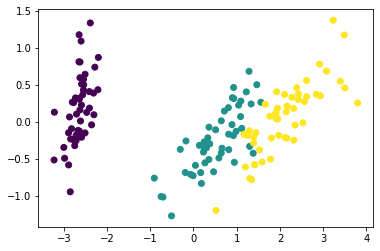

In [11]:
plt.scatter(X[:,0] , X[:,1] , c=y)

# 準備訓練/測試資料

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.2 ,  random_state=0)

## step 1. 開 SVC 函數學習機

In [14]:
from sklearn.svm import SVC

In [15]:
clf = SVC(gamma='auto')

## step 2. 訓練

In [16]:
clf.fit(x_train , y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## step 3. 預測

In [17]:
y_predict = clf.predict(x_test)

In [18]:
y_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

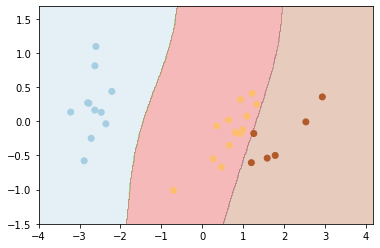

In [19]:
x0 = np.arange(-4 , 4.2 , 0.02)
y0 = np.arange(-1.5 , 1.7 , 0.02)

xm , ym = np.meshgrid(x0 , y0)

P = np.c_[xm.ravel() , ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)
plt.contourf(xm , ym , Z , alpha=0.3 , cmap='Paired')
plt.scatter(x_test[:,0] , x_test[:,1] , c=y_test , cmap='Paired')

# K-Means 自動分類(非監督式學習，濃縮)

In [20]:
x = np.random.rand(100 , 2)

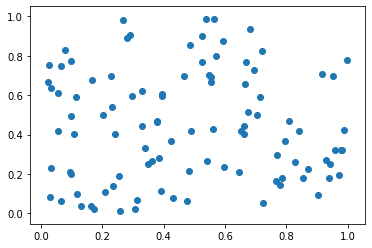

In [21]:
plt.scatter(x[:,0] , x[:,1])

## step 1. 打開 K-Means 學習機

In [22]:
from sklearn.cluster import KMeans

In [23]:
clf = KMeans(n_clusters=3)

## step 2. 訓練

In [24]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## step 3. 預測

In [25]:
clf.predict(x)

array([0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0,
       1, 0, 2, 1, 2, 0, 1, 0, 2, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2,
       1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0,
       1, 0, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 2, 2, 2, 0, 2, 2, 1,
       2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0])

In [26]:
clf.labels_

array([0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0,
       1, 0, 2, 1, 2, 0, 1, 0, 2, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2,
       1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0,
       1, 0, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 2, 2, 2, 0, 2, 2, 1,
       2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0])

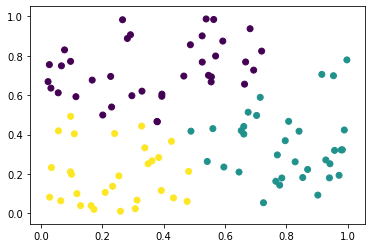

In [27]:
plt.scatter(x[:,0] , x[:,1] , c=clf.labels_)

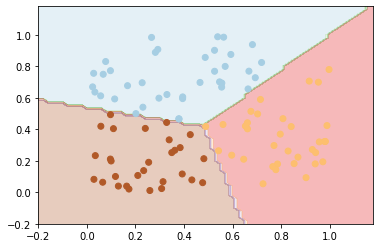

In [28]:
x0 = y0 = np.arange(-0.2 , 1.2 , 0.02)
xm , ym = np.meshgrid(x0 , y0)

P = np.c_[xm.ravel() , ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)
plt.contourf(xm , ym , Z , alpha=0.3 , cmap='Paired')
plt.scatter(x[:,0] , x[:,1] , c=clf.labels_ , cmap='Paired')

# make_blobs 生更像真實世界的數據

In [29]:
from sklearn.datasets.samples_generator import make_blobs

In [30]:
x , y = make_blobs(n_samples=500 , centers=3 , n_features=2 , random_state=0)

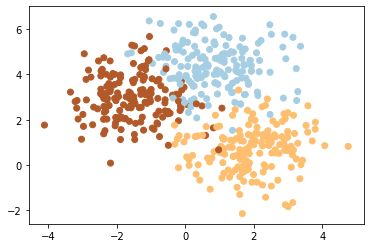

In [31]:
plt.scatter(x[:,0] , x[:,1] , c=y , cmap='Paired')

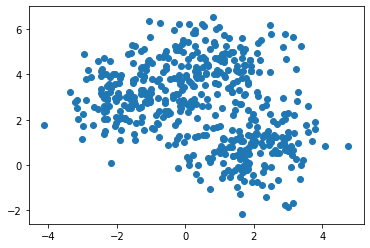

In [32]:
plt.scatter(x[:,0] , x[:,1])

## step 1. 打開 K-Means 函數學習機

In [33]:
clf = KMeans(n_clusters=3)

## step 2. 訓練

In [34]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## step 3. 預測

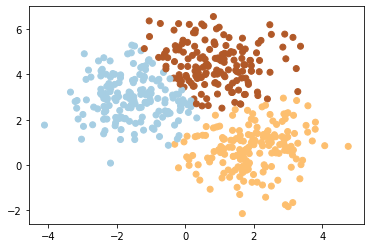

In [35]:
plt.scatter(x[:,0] , x[:,1] , c=clf.labels_ , cmap='Paired')

# Mean-Shifts 完全自動分類

## step 1. 打開函數學習機

In [36]:
from sklearn.cluster import MeanShift

In [37]:
clf = MeanShift(bandwidth=0.5) #bandwidth分細一點

## step 2. 訓練

In [38]:
clf.fit(x)

MeanShift(bandwidth=0.5, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

## step 3. 預測

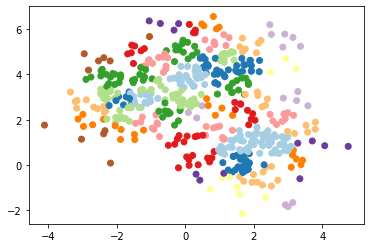

In [39]:
plt.scatter(x[:,0] , x[:,1] , c=clf.labels_ , cmap='Paired')

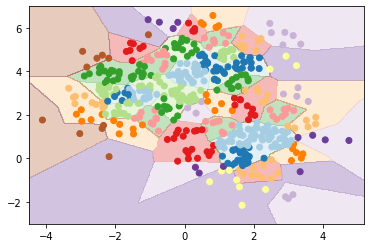

In [40]:
x0 = np.arange(-4.5 , 5.2 , 0.02)
y0 = np.arange(-3 , 7 , 0.02)

xm , ym = np.meshgrid(x0 , y0)

P = np.c_[xm.ravel() , ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)

plt.contourf(xm , ym , Z , alpha=0.3 , cmap='Paired')
plt.scatter(x[:,0] , x[:,1] , c=clf.labels_ , cmap='Paired')

# cross_val_score(交叉驗證)

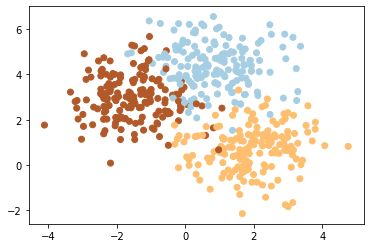

In [41]:
plt.scatter(x[:,0] , x[:,1] , c=y , cmap='Paired')

In [42]:
from sklearn.model_selection import cross_val_score

### SVC

In [43]:
from sklearn.svm import SVC

In [44]:
clf = SVC(gamma='auto')

In [45]:
scores = cross_val_score(clf , x , y , cv=5)

In [46]:
scores

array([0.94117647, 0.94059406, 0.98989899, 0.90909091, 0.92929293])

In [47]:
scores.max()

0.98989898989899

In [48]:
scores.mean()

0.9420106716554008

### Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
clf = DecisionTreeClassifier()

In [51]:
scores = cross_val_score(clf , x , y , cv=5)

In [52]:
scores

array([0.92156863, 0.89108911, 0.95959596, 0.90909091, 0.88888889])

In [53]:
scores.max()

0.9595959595959596

In [54]:
scores.mean()

0.9140466987875258

### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
clf = RandomForestClassifier(n_estimators=100)

In [57]:
scores = cross_val_score(clf , x , y , cv=5)

In [58]:
scores

array([0.92156863, 0.92079208, 0.96969697, 0.88888889, 0.88888889])

In [59]:
scores.max()

0.9696969696969697

In [60]:
scores.mean()

0.9179670908267298